In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.7 MB/s 
     |████████████████████████████████| 9.8 MB 289 kB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#основные библиотеки
import pandas as pd
import numpy as np

#SARIMA
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima 

#Метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


In [3]:
#п.1 выборка исследования
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)

In [4]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [5]:
#смотрим размер выборки
df.index.freq = 'MS' #создаем индекс с частотой начала месяца
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


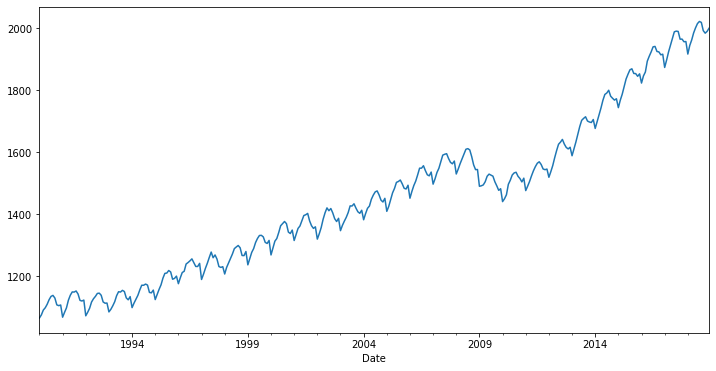

In [6]:
#визуализируем - строим график временногоряда
ax = df['Employees'].plot(figsize=(12,6)) 
ax.autoscale(axis='x', tight=True)

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

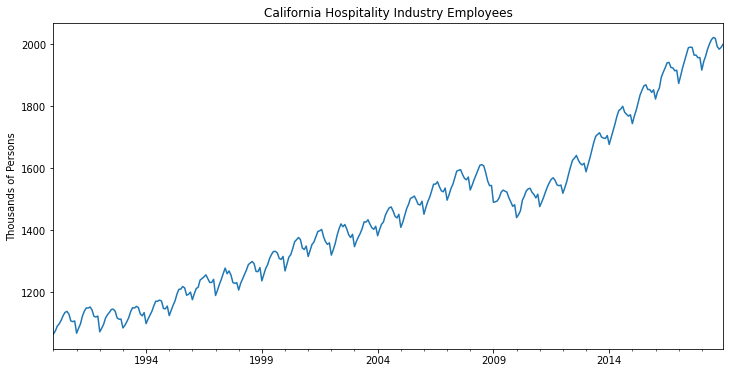

In [10]:
# добавьте заголовок и подписи к графику выше

title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = '' 

ax = df['Employees'].plot(figsize=(12,6),title=title) #добавлем заголовок
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

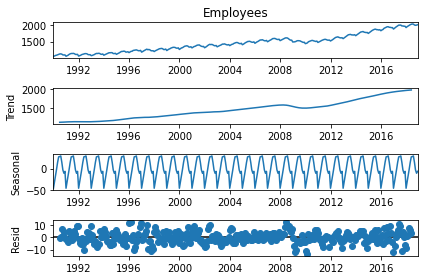

In [11]:
#п.2 строим ETS декомпозицию для последующего анализа датасета по 4-м критериям
#тот же временной ряд
#тренд временного ряда
#сезонность
#белый шум
r = seasonal_decompose(df['Employees'], model='additive')
r.plot();

In [12]:
#Запускаем pmdarima.auto_arima чтобы получить набор параметров
auto_arima(df['Employees'],seasonal=True,m=12).summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 07 Mar 2022   AIC                           2208.504
Time:                                      17:15:43   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Разделиv данные на train/test
train = df.iloc[:len(df)-12]

test = df.iloc[len(df)-12:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
#Обучаем SARIMA с найденными параметрами на train
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12)) #model = [код: вызов одной функции]
results = model.fit() #обучаем модель на обучающей выборке данных
results.summary() #получаем результаты

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Mon, 07 Mar 2022   AIC                           2128.116
Time:                                      17:15:58   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.288      0.000       0.839       1.009
ma.L1         -0.9583      0.071    -13.552      0.000      -1.097      -0.820
ma.L2          0.1496      0.061      2.446      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    731.133      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.153      0.000      -0.838      -0.666
sigma2        28.7706      1.685     17.073      0.000      25.468      32.074
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#Получаем прогнозируемые значения
start=len(train) #первая точка в тестовом множестве
end=len(train)+len(test)-1 #последняя точка в тестовом множеств

#предсказываем значения,передав модели results точку начала и окончания
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions SARIMAX(1, 1, 2)x(1, 0, 1, 12)')

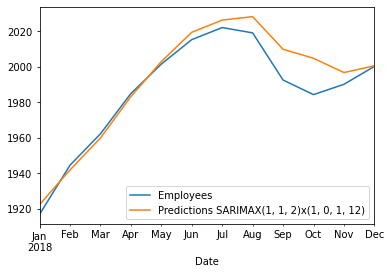

In [16]:
#Сравниваем результаты
test['Employees'].plot(legend=True)
predictions.plot(legend=True)

In [17]:
#Оцениваем качество модели с помощью MSE и RMSE

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

mse_value = mean_squared_error(test['Employees'], predictions)
rmse_value = rmse(test['Employees'], predictions)

print(f'SARIMA(1,1,2)(1,0,1,12) MSE Error: {mse_value:11.10}')  
print(f'SARIMA(1,1,2)(1,0,1,12) RMSE Error: {rmse_value:11.10}') 

SARIMA(1,1,2)(1,0,1,12) MSE Error: 77.67620142
SARIMA(1,1,2)(1,0,1,12) RMSE Error: 8.813410317


In [18]:
#Тренируйем модель на полном датасете и предскажите на год вперед
#Не знаем данных будущего, поэтому обучаем модель на всем датасете
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12)) 
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 07 Mar 2022   AIC                           2208.504
Time:                                      17:22:49   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# для прогнозирования используйем с нужными параметрами results.predict() 
#задаем точки следующего года
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) Forecast') #fcast = [код] 

In [21]:
fcast

2018-12-01    1991.722244
2019-01-01    1963.876814
2019-02-01    1986.819686
2019-03-01    2006.001894
2019-04-01    2030.338390
2019-05-01    2050.319690
2019-06-01    2067.145786
2019-07-01    2074.926987
2019-08-01    2076.491163
2019-09-01    2056.901820
2019-10-01    2051.847051
2019-11-01    2047.934254
2019-12-01    2053.899973
Freq: MS, Name: SARIMAX(1, 1, 2)x(1, 0, [1], 12) Forecast, dtype: float64

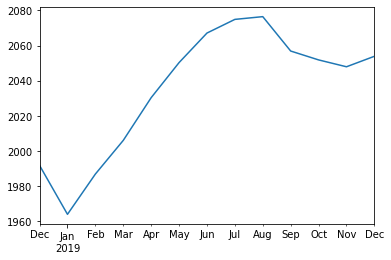

In [22]:
#Построим график предсказаний и график исходных данных
fcast.plot()

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

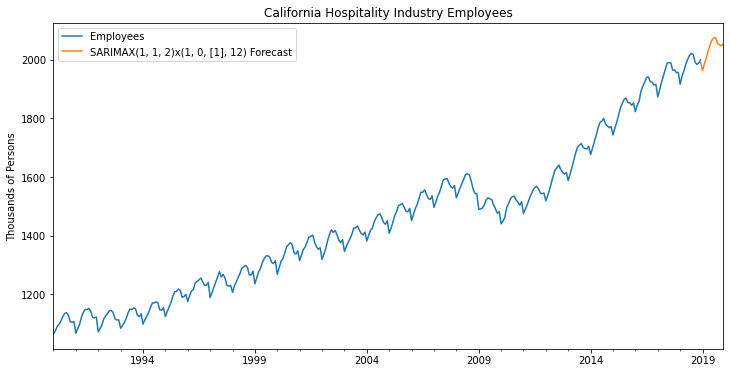

In [23]:
#строим график для всего датасета
title = 'California Hospitality Industry Employees' #название графика
ylabel = 'Thousands of Persons' #название оси Y
xlabel = '' #по сравнению с ожидаемым результатом не указываем название оси Х


ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

PROPHET

In [24]:
#посмотрим еще раз на наш датасет
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [25]:
#посмотрим на обущающую выборку
train.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [26]:
#посмотрим на тестовую выборку
test.head()

,Employees
Date,
2018-01-01,1916.8
2018-02-01,1944.5
2018-03-01,1962.2
2018-04-01,1984.9
2018-05-01,2001.5


In [27]:
#загружаем профет
from fbprophet import Prophet

In [29]:
#созадем модель
model = Prophet()
model

In [30]:
#Сбраываем индексы для обучуемой и тестовой выгрузок, чтобы работать только с колонками
train_0 = train.reset_index() 
test_0 = test.reset_index() 

In [31]:
train_0.head() #посмотрим преобразование после сброса индексов

,Date,Employees
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [32]:
# Переименуем столбцы в обучающем и тестовом датасетах, чтобы они подходили для использования методов Prophet
train_0.columns = ['ds', 'y'] 
test_0.columns = ['ds', 'y'] 

In [35]:
#проверяем переименование
train_0.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [36]:
#обучение модели
model.fit(train_0)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Качество модели

In [37]:
future = model.make_future_dataframe(periods=12, freq='MS') # создаем через профет дата-фрейм на 12 месяцев
future.tail(12) # выводим 12 строк с конца

,ds
336,2018-01-01
337,2018-02-01
338,2018-03-01
339,2018-04-01
340,2018-05-01
341,2018-06-01
342,2018-07-01
343,2018-08-01
344,2018-09-01
345,2018-10-01


In [38]:
#строим прогноз
forecast = model.predict(future)
forecast.head() # возвращает много колонок

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1105.140489,1050.082548,1067.651254,1105.140489,1105.140489,-46.211417,-46.211417,-46.211417,-46.211417,-46.211417,-46.211417,0.0,0.0,0.0,1058.929072
1,1990-02-01,1105.802454,1065.159036,1082.613970,1105.802454,1105.802454,-31.904082,-31.904082,-31.904082,-31.904082,-31.904082,-31.904082,0.0,0.0,0.0,1073.898372
2,1990-03-01,1106.400357,1080.116001,1098.254573,1106.400357,1106.400357,-17.429935,-17.429935,-17.429935,-17.429935,-17.429935,-17.429935,0.0,0.0,0.0,1088.970422
3,1990-04-01,1107.062322,1096.371912,1113.767709,1107.062322,1107.062322,-2.276962,-2.276962,-2.276962,-2.276962,-2.276962,-2.276962,0.0,0.0,0.0,1104.785359
4,1990-05-01,1107.702933,1113.274027,1130.929937,1107.702933,1107.702933,14.034054,14.034054,14.034054,14.034054,14.034054,14.034054,0.0,0.0,0.0,1121.736986


In [39]:
#выводим только необходимые столбцы
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() 

,ds,yhat,yhat_lower,yhat_upper
343,2018-08-01,2076.369515,2065.015853,2087.358612
344,2018-09-01,2067.030396,2055.197598,2079.059188
345,2018-10-01,2054.682992,2042.069573,2066.092433
346,2018-11-01,2052.813211,2038.795660,2064.966699
347,2018-12-01,2063.225608,2048.100673,2075.706250


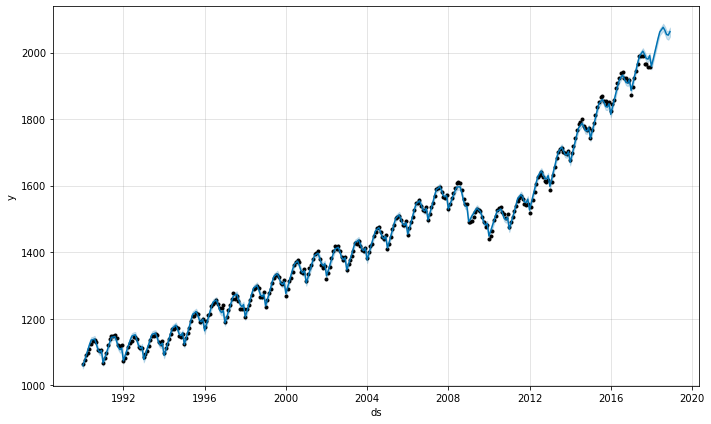

In [43]:
#визуализируем модель и строим прогноз
model.plot(forecast);

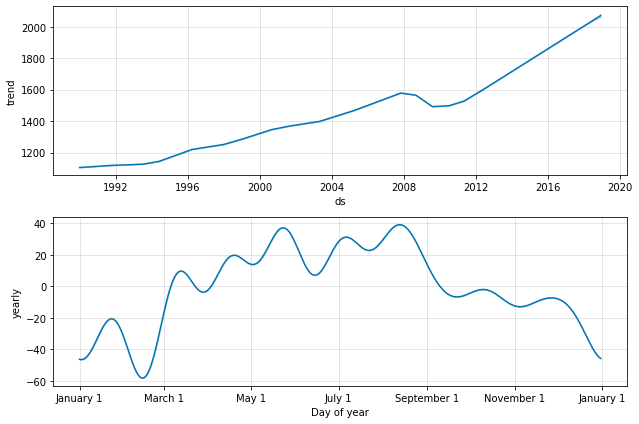

In [44]:
#раскладываем модель на компоненты (тренд  и сезонность)
model.plot_components(forecast);

Ошибка прогноза

In [46]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast['yhat'].tail(12), test_0['y']) 

51.062927174242624

In [48]:
np.mean(np.abs(forecast.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

2.5677471600830106

Итоговое отклонение на 2.5% (т.е. наж прогноз ошибаеся на 2,5 % или 51 человека)

Настройка параметров модели

In [50]:
model_1 = Prophet(growth = 'linear', yearly_seasonality = True, seasonality_mode='additive') #создаем объект модели профет
model_1.fit(train_0) #прогоняем новую модель через набор данных

future_1 = model_1.make_future_dataframe(periods=12, freq='MS') # профет формирует дата-фрейм на 12 месяцев
forecast_1 = model_1.predict(future_1) #предсказываем значения по новой модели
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(12), test_0['y'])
print('MSE: ', error_forecast_1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE:  51.062927174242624


In [51]:
#проверяем ошибку прогноза
np.mean(np.abs(forecast_1.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

2.5677471600830106